# 多层感知机测试

In [2]:
import torch
import torch.nn as nn

In [6]:
class MLP(nn.Module):
    def __init__(self, input_size = 100, hidden_size = 128, output_size = 100):
        super(MLP, self).__init__()
        # 第一层 100 -> 128
        self.layer1= nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        # 第二层 128 -> 100
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # 第一层
        x = self.layer1(x)
        x = self.relu(x)

        # 第二层
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

In [7]:
model = MLP()

# 查看第一层权重
print("第一层权重统计：")
print(f"均值: {model.layer1.weight.mean().item():.4f}")
print(f"标准差: {model.layer1.weight.std().item():.4f}")
print(f"最大值: {model.layer1.weight.max().item():.4f}")
print(f"最小值: {model.layer1.weight.min().item():.4f}")

# 查看第二层权重
print("\n第二层权重统计：")
print(f"均值: {model.layer2.weight.mean().item():.4f}")
print(f"标准差: {model.layer2.weight.std().item():.4f}")
print(f"最大值: {model.layer2.weight.max().item():.4f}")
print(f"最小值: {model.layer2.weight.min().item():.4f}")

test_model = torch.rand(32, 100)

output = model(test_model)
print(output)
print(f"输入形状: {test_model.shape}")
print(f"输出形状: {output.shape}")
print(f"输出值范围: [{output.min().item():.4f}, {output.max().item():.4f}]")

第一层权重统计：
均值: 0.0010
标准差: 0.0580
最大值: 0.1000
最小值: -0.1000

第二层权重统计：
均值: -0.0002
标准差: 0.0510
最大值: 0.0884
最小值: -0.0884
tensor([[0.4839, 0.5235, 0.4164,  ..., 0.4363, 0.4508, 0.5136],
        [0.4838, 0.4566, 0.4270,  ..., 0.4500, 0.4418, 0.5303],
        [0.4344, 0.5002, 0.4568,  ..., 0.4737, 0.4522, 0.5281],
        ...,
        [0.4901, 0.5002, 0.4352,  ..., 0.4343, 0.4165, 0.5295],
        [0.4858, 0.5182, 0.4589,  ..., 0.4726, 0.4345, 0.5422],
        [0.4993, 0.5024, 0.4217,  ..., 0.4624, 0.4383, 0.4963]],
       grad_fn=<SigmoidBackward0>)
输入形状: torch.Size([32, 100])
输出形状: torch.Size([32, 100])
输出值范围: [0.3231, 0.6149]


误差: 0.0838


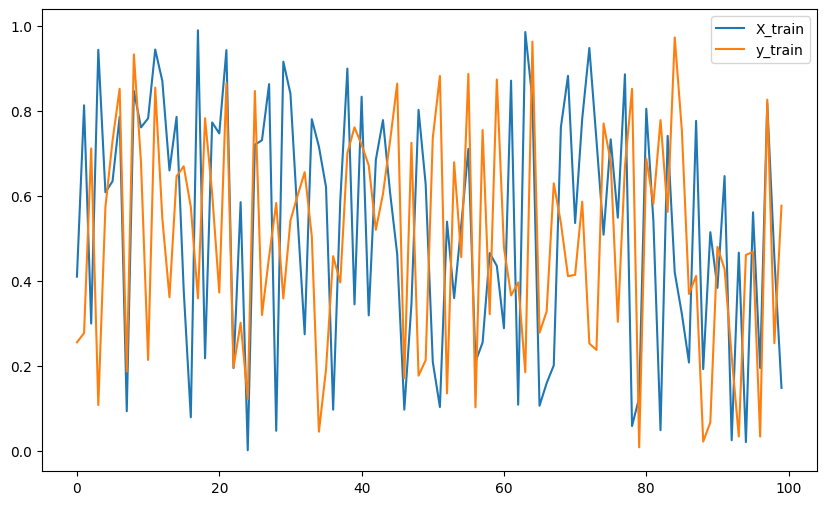

Epoch 1/100, Loss: 0.0846
Epoch 11/100, Loss: 0.0830
Epoch 21/100, Loss: 0.0826
Epoch 31/100, Loss: 0.0821
Epoch 41/100, Loss: 0.0815
Epoch 51/100, Loss: 0.0807
Epoch 61/100, Loss: 0.0800
Epoch 71/100, Loss: 0.0791
Epoch 81/100, Loss: 0.0783
Epoch 91/100, Loss: 0.0775
参数名: layer1.weight, 形状: torch.Size([128, 100]), 值: Parameter containing:
tensor([[-0.0064, -0.1191,  0.1263,  ..., -0.0637, -0.1611, -0.0201],
        [ 0.0753, -0.1475,  0.1214,  ...,  0.0842,  0.0241, -0.1005],
        [-0.0485,  0.0164,  0.0017,  ..., -0.1660,  0.0555,  0.0754],
        ...,
        [-0.0088,  0.0853, -0.0232,  ...,  0.0867, -0.0699,  0.0385],
        [ 0.0396,  0.0266,  0.0920,  ..., -0.0422,  0.0748,  0.0294],
        [-0.0132, -0.0231,  0.0416,  ...,  0.0839, -0.0942,  0.1017]],
       requires_grad=True)
参数名: layer1.bias, 形状: torch.Size([128]), 值: Parameter containing:
tensor([-0.0098,  0.0414, -0.0067, -0.1119,  0.0836, -0.0022, -0.0255,  0.1083,
         0.1050, -0.0284, -0.0671, -0.0864,  0.0054

In [14]:
criterion = nn.MSELoss()
optimizer =torch.optim.Adam(model.parameters(), lr=0.001)

# 训练开始前误差
loss = criterion(output, test_model)
print(f"误差: {loss.item():.4f}")

# 训练循环
def train(model, x_train, y_train, epochs = 100):
    for epoch in range(epochs):
        output = model(x_train)
        loss = criterion(output, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

X_train = torch.rand(1000, 100)
y_train = torch.rand(1000, 100)
import matplotlib.pyplot as plt
# 制作图片
plt.figure(figsize=(10, 6))
plt.plot(range(100), X_train[0], label='X_train')
plt.plot(range(100), y_train[0], label='y_train')
plt.legend()
plt.show()

train(model, X_train, y_train, epochs=100)
# 打印参数
for name, param in model.named_parameters():
    print(f"参数名: {name}, 形状: {param.shape}, 值: {param}")


In [15]:
# 预测
output = model(X_train)
# 训练后误差
loss = criterion(output, y_train)
print(f"误差: {loss.item():.4f}")




误差: 0.0767
